In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.6 MB/s eta 0:00:00
time: 365 µs (started: 2023-04-15 20:33:30 +00:00)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
np.set_printoptions(threshold=np.inf)

time: 325 ms (started: 2023-04-15 20:33:30 +00:00)


In [4]:

sample = pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/NEW DATASET/TRAINING_DATA.csv')

testData =pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/NEW DATASET/TEST_DATA.csv')

time: 2.63 s (started: 2023-04-15 20:33:30 +00:00)


In [5]:
X_train= sample.drop('Object_Held', axis=1)
y_train= sample[['Object_Held']]
X_test= testData.drop('Object_Held', axis=1)
y_test= testData[['Object_Held']]

time: 26.8 ms (started: 2023-04-15 20:33:33 +00:00)


In [6]:
X_train.columns = sample.columns[:-1]
cols=sample.columns[:-1]

time: 538 µs (started: 2023-04-15 20:33:33 +00:00)


In [7]:
X_train

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
0,0.010445,32.839093,0.796688,32.801138,0.672049,32.598748,0.322165,32.442574,0.086511,45.194791,...,0.453634,57.085112,1.541629,107.008139,0.148899,107.020952,-0.157546,107.005990,0.418681,26.483838
1,0.031048,26.828344,0.550354,26.793490,0.500228,26.617565,0.193967,26.995865,0.013110,59.185006,...,0.158144,16.654109,1.564327,102.981643,-0.051086,103.080865,-0.004866,103.175877,-0.007585,103.668021
2,0.038457,110.567765,0.808517,110.321907,0.440485,109.104348,0.101487,104.691031,0.051087,202.653217,...,0.639911,201.220968,1.496583,363.765022,0.211634,363.553092,-0.418162,362.442545,0.439608,357.595823
3,0.089646,144.278609,0.958439,143.564293,0.244826,140.548777,0.516424,141.254061,0.073867,251.329720,...,0.650024,208.518358,1.518549,456.370160,0.327488,456.375175,-0.392451,456.453786,0.621246,456.896505
4,0.018616,40.906474,0.646382,40.895683,0.411657,40.837607,0.288000,25.540176,0.015417,27.131941,...,0.307123,29.209126,1.543406,98.906924,0.115545,98.891234,0.009058,98.849936,0.095610,98.690772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,0.098011,131.484313,0.433704,127.478153,0.261010,124.598035,0.636805,133.302471,0.079848,136.269939,...,0.220674,11.973770,1.728794,1296.491574,-0.963922,1308.643326,0.411771,1305.174075,-0.268828,1247.196519
103996,-0.207267,29.689574,1.395837,29.627845,0.217758,29.296491,-0.342476,29.341589,0.047683,24.810969,...,0.067794,18.462487,1.564526,68.645733,-0.171600,68.572393,0.188174,68.784507,-0.114198,69.837109
103997,0.012985,9.170545,0.477758,9.073175,0.278467,8.546033,0.172794,8.245469,0.011595,9.970651,...,0.245780,40.719445,1.341691,43.103524,0.047159,43.059404,0.244886,42.996989,-0.000964,42.758392
103998,-0.000092,10.575114,0.756654,10.468608,0.784339,9.891076,0.227583,9.575672,0.000513,10.423315,...,0.289469,13.741549,1.617730,10.880924,0.001656,10.738996,0.085127,10.678098,0.203319,10.538928


time: 60.5 ms (started: 2023-04-15 20:33:33 +00:00)


In [8]:
X_train.describe()

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
count,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,...,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000
mean,0.010377,59.019077,0.757873,58.912398,0.439070,57.599880,0.105654,54.318285,0.017875,73.127612,...,0.343013,73.192579,1.538761,168.922281,0.097913,168.779236,-0.045654,168.651112,0.157913,151.315163
std,0.055551,46.583395,0.270122,46.528936,0.205687,42.997361,0.307863,39.434538,0.040321,104.034816,...,0.299632,72.030838,0.093073,152.145587,0.187873,151.753968,0.243162,151.604452,0.271902,149.612572
min,-0.245457,0.869717,0.150982,0.819148,-0.867079,1.449388,-0.878010,3.215971,-0.170895,3.086973,...,-0.589622,2.924713,0.346626,1.215740,-1.108879,1.435768,-0.493507,1.644472,-0.504787,2.091536
25%,0.001237,27.554567,0.576603,27.540487,0.311816,27.365424,-0.135092,25.684883,0.000031,23.781059,...,0.142518,19.096364,1.526144,66.929315,0.000537,66.907825,-0.292109,66.837465,-0.033042,53.333417
50%,0.014506,44.450103,0.694840,44.443107,0.443937,44.220685,0.168104,43.202844,0.011537,46.745350,...,0.313514,39.722224,1.548317,124.227595,0.099363,124.280676,-0.001013,124.143252,0.104243,93.046680
75%,0.030121,85.215340,0.848801,84.945624,0.597703,83.277963,0.321878,77.314024,0.026729,77.366670,...,0.499017,109.572627,1.588869,243.552500,0.199183,243.772409,0.077355,243.557953,0.353742,226.429805
max,0.302955,630.731861,1.710592,633.479712,1.243738,358.339848,1.044886,358.601367,0.263529,6920.296996,...,1.699928,826.251721,1.730182,2134.194766,1.425054,2137.999104,0.872015,2132.662026,1.820740,2124.201220


time: 287 ms (started: 2023-04-15 20:33:33 +00:00)


In [9]:
X_test

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
0,0.009786,104.351794,0.546490,104.338198,0.384963,104.267620,-0.310730,104.840006,0.013076,57.979368,...,0.390803,105.879330,1.542467,266.063906,0.250837,266.096220,-0.115038,266.091886,0.111861,266.050631
1,0.071798,47.750220,0.875184,47.741112,0.736651,47.693654,0.288597,47.587819,0.053620,50.020249,...,0.670850,99.985989,1.534317,161.109601,0.132790,161.104654,-0.197171,161.140641,0.551562,161.309158
2,0.016403,24.056021,0.607792,24.416491,0.597581,26.951786,0.165221,29.055573,0.003436,58.506011,...,0.337532,41.081555,1.548550,71.098654,0.586026,71.574493,0.028959,69.896322,-0.141075,64.418194
3,0.017546,41.109085,0.648372,41.097631,0.410927,41.036163,0.296264,27.815145,0.014571,25.404348,...,0.318431,28.611590,1.543291,98.536199,0.134482,98.519135,0.009753,98.484929,0.085085,98.355228
4,-0.131836,75.208992,0.802505,74.165394,0.465034,68.509771,0.517057,65.740103,-0.048976,165.847831,...,0.774161,211.228996,1.498319,410.974099,0.222266,410.490621,-0.317619,411.477469,0.766448,396.303329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,0.001476,10.744247,0.758046,10.630004,0.784031,10.007535,0.230671,9.677469,0.001163,10.605830,...,0.335339,17.223968,1.614494,14.068160,0.023397,13.984338,0.084325,13.848997,0.204087,8.543576
25996,0.225909,106.884103,0.608045,106.886382,0.530822,106.902916,0.381490,69.542631,0.193205,49.949125,...,0.487840,132.622270,1.523860,234.300511,0.175064,234.293104,-0.275213,234.272760,0.476786,121.220785
25997,0.058375,77.086686,0.715811,76.544435,0.406238,74.036217,0.383465,74.579521,0.058289,116.031860,...,0.678046,125.517225,1.507271,249.579236,0.146511,249.973944,-0.387625,249.615286,0.407653,247.678163
25998,0.005426,28.144848,0.587001,28.182676,0.755417,26.608374,-0.078174,29.637256,0.001609,7.875354,...,0.231841,9.034118,1.582597,43.474422,-0.046180,43.689856,0.078914,43.817078,0.095219,44.234315


time: 36.8 ms (started: 2023-04-15 20:33:34 +00:00)


In [10]:
X_test.describe()

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
count,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,...,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000
mean,0.010750,59.043329,0.757758,58.939814,0.439112,57.506686,0.105795,54.188163,0.017795,72.528570,...,0.342211,73.302435,1.538584,167.856262,0.097469,167.704795,-0.044745,167.645605,0.157781,150.911514
std,0.055664,46.803846,0.270392,46.746137,0.205466,42.772196,0.307529,39.180159,0.040551,87.889941,...,0.298618,72.069633,0.095435,150.242809,0.188040,149.820428,0.243447,149.874731,0.273309,148.928822
min,-0.241188,1.071530,0.169419,0.635060,-0.836450,1.798398,-0.873046,3.142798,-0.170528,0.893441,...,-0.573349,5.331310,0.347416,2.066557,-1.106442,2.232496,-0.491846,1.794654,-0.504623,2.360655
25%,0.001273,27.407552,0.577786,27.371548,0.311367,27.256905,-0.134792,25.567268,-0.000008,23.739231,...,0.140829,19.140674,1.527273,65.961657,0.000206,65.907064,-0.292119,65.865595,-0.034278,52.668712
50%,0.014466,44.667781,0.695022,44.636677,0.443164,44.392968,0.168841,43.425935,0.011527,46.989677,...,0.314293,39.922820,1.548380,124.042660,0.097171,124.070058,0.000109,124.035432,0.103709,93.221167
75%,0.030294,85.008126,0.845948,84.716815,0.597611,82.904280,0.321453,77.025957,0.026684,77.176399,...,0.502240,109.714413,1.589288,243.101599,0.198643,243.212916,0.077913,243.180702,0.353754,225.911573
max,0.303366,544.983063,1.710356,544.175606,1.242769,322.423008,1.032131,322.219117,0.261181,2735.904587,...,1.668118,688.076451,1.722217,1352.028231,1.465783,1361.567870,0.872022,1355.024021,1.820615,1330.888324


time: 158 ms (started: 2023-04-15 20:33:34 +00:00)


time: 166 ms (started: 2023-04-15 20:33:34 +00:00)


## Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalar = StandardScaler().fit(X_train)
scalar
X_train= scalar.transform(X_train)


time: 1.19 s (started: 2023-04-15 20:33:34 +00:00)


In [12]:
X_test = scalar.transform(X_test)
X_test= pd.DataFrame(X_test)

time: 9.69 ms (started: 2023-04-15 20:33:35 +00:00)


In [13]:
X_train= pd.DataFrame(X_train)
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,...,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05
mean,-3.907985e-17,-1.560461e-16,-6.176256e-17,6.784317e-17,-2.022314e-17,-5.260749e-17,-3.019807e-17,-9.701641e-17,1.236618e-17,-1.143017e-16,...,-2.206782e-16,-3.432468e-16,6.843073e-16,7.283063e-17,5.465713e-17,8.786134e-17,-3.672276e-17,1.242083e-16,1.239009e-16,1.844678e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-4.605402e+00,-1.248291e+00,-2.246745e+00,-1.248546e+00,-6.350220e+00,-1.305912e+00,-3.195149e+00,-1.295883e+00,-4.681675e+00,-6.732455e-01,...,-3.112612e+00,-9.755294e-01,-1.280867e+01,-1.102282e+00,-6.423476e+00,-1.102734e+00,-1.841798e+00,-1.101600e+00,-2.437290e+00,-9.974051e-01
25%,-1.645376e-01,-6.754480e-01,-6.710739e-01,-6.742484e-01,-6.186799e-01,-7.031734e-01,-7.819924e-01,-7.261031e-01,-4.425446e-01,-4.743296e-01,...,-6.691405e-01,-7.510183e-01,-1.355671e-01,-6.703675e-01,-5.183116e-01,-6.712965e-01,-1.013549e+00,-6.715775e-01,-7.022957e-01,-6.549063e-01
50%,7.432692e-02,-3.127519e-01,-2.333536e-01,-3.109755e-01,2.366564e-02,-3.111647e-01,2.028513e-01,-2.818721e-01,-1.571730e-01,-2.535919e-01,...,-9.844896e-02,-4.646692e-01,1.026644e-01,-2.937640e-01,7.715062e-03,-2.932297e-01,1.835833e-01,-2.935803e-01,-1.973862e-01,-3.894644e-01
75%,3.554338e-01,5.623547e-01,3.366195e-01,5.595088e-01,7.712403e-01,5.972042e-01,7.023432e-01,5.831398e-01,2.195885e-01,4.074673e-02,...,5.206536e-01,5.050646e-01,5.383741e-01,4.905208e-01,5.390371e-01,4.941784e-01,5.058735e-01,4.940963e-01,7.202255e-01,5.020634e-01
max,5.266859e+00,1.227295e+01,3.527016e+00,1.234866e+01,3.912128e+00,6.994416e+00,3.050829e+00,7.716194e+00,6.092447e+00,6.581645e+01,...,4.528625e+00,1.045473e+01,2.056687e+00,1.291711e+01,7.064065e+00,1.297646e+01,3.773920e+00,1.295490e+01,6.115577e+00,1.318670e+01


time: 330 ms (started: 2023-04-15 20:34:12 +00:00)


In [14]:
scalar.get_params(deep=True)

{'copy': True, 'with_mean': True, 'with_std': True}

time: 3.99 ms (started: 2023-04-15 20:34:40 +00:00)


## PCA

In [15]:
from sklearn.decomposition import PCA
# pca = PCA(n_components=5)
pca = PCA()
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC{}'.format(i) for i in range(1,33,1)])

time: 529 ms (started: 2023-04-15 20:34:49 +00:00)


In [16]:
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,-1.079153,-1.511967,-0.147611,-1.440011,2.447635,-1.517295,-0.599317,0.213785,0.495297,0.316445,...,-0.185365,-0.041427,-0.100992,0.029031,0.014606,-0.005046,-0.003763,-0.001029,-0.000131,-0.000369
1,-2.335855,0.529823,1.124112,-0.231441,0.964326,0.751084,0.085443,0.246855,-0.645806,0.778531,...,0.117310,0.035554,-0.050744,-0.003392,0.004297,0.002875,-0.000377,0.000921,0.000664,0.000427
2,6.315912,0.068412,-0.764194,-0.375139,0.283259,0.074741,1.046318,0.139936,-0.177715,0.539767,...,-0.239816,-0.142043,0.032734,0.021822,-0.010794,0.013894,0.009768,-0.001362,-0.001821,0.000507
3,8.337553,0.772039,-0.932769,-0.882899,0.961646,-0.680245,1.483954,-0.063228,-0.418476,-0.814917,...,0.243631,-0.240756,-0.205072,0.005178,0.036575,0.000069,-0.001787,0.002680,-0.000716,0.001477
4,-2.121760,-0.276020,1.309656,-0.046424,-0.135378,-0.300503,0.180755,-0.229964,0.006841,-1.015633,...,0.074286,-0.051673,0.111019,0.158353,-0.006944,0.001373,0.001427,-0.000060,-0.000445,0.000128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,7.355313,7.748587,3.898466,3.652079,2.192688,-1.013384,-2.024073,-2.256681,1.305626,-1.298719,...,-0.108290,0.894026,-0.496291,0.081719,0.155602,0.004648,0.035781,0.048060,0.018093,0.012240
103996,-3.050823,1.152167,-5.042848,1.808441,2.490603,-2.571199,-3.913538,0.781833,1.321337,-0.894561,...,-0.833411,-0.056973,-0.063156,-0.106740,0.014465,-0.001823,0.005684,0.000123,-0.000997,0.000038
103997,-3.059180,-0.598988,2.118689,1.422867,-1.218486,-1.225421,-0.163778,1.030046,-1.165390,-0.146623,...,0.011780,0.039457,-0.006971,0.007833,0.002428,0.002168,0.001858,0.001403,0.000625,-0.000341
103998,-4.010651,-1.380656,1.472554,-0.169433,1.013548,0.770224,0.177408,-1.357306,0.502398,0.022778,...,-0.034796,-0.038155,-0.005727,0.018365,0.005892,0.000914,0.000365,0.000157,0.000053,0.000254


time: 73.6 ms (started: 2023-04-15 20:34:49 +00:00)


In [17]:
pca.explained_variance_ratio_.shape, pca.explained_variance_ratio_

((32,),
 array([3.93635227e-01, 1.24762053e-01, 1.18611084e-01, 6.33569133e-02,
        5.18495059e-02, 4.61874288e-02, 3.12795119e-02, 3.08574023e-02,
        2.30650019e-02, 2.13228593e-02, 1.73227197e-02, 1.57880285e-02,
        1.25994637e-02, 1.23241753e-02, 9.69130640e-03, 5.75195889e-03,
        4.65616072e-03, 3.94373278e-03, 3.49445094e-03, 2.55820622e-03,
        1.86431397e-03, 1.76654672e-03, 1.13938699e-03, 9.62450594e-04,
        5.78276561e-04, 4.54243339e-04, 1.41609487e-04, 2.77623479e-05,
        7.41302858e-06, 5.54999185e-07, 1.44969877e-07, 1.06373264e-07]))

time: 7.4 ms (started: 2023-04-15 20:34:49 +00:00)


In [18]:
Principal_Components = pca.components_

time: 383 µs (started: 2023-04-15 20:34:49 +00:00)


In [19]:
PC = pd.DataFrame(Principal_Components)

time: 648 µs (started: 2023-04-15 20:34:49 +00:00)


In [20]:
PC

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.038970,0.227480,-0.041183,0.227089,-0.029853,0.234044,0.085140,0.212645,0.074480,0.203332,...,0.132899,0.232995,-0.075767,0.257810,0.084774,0.257755,-0.163750,0.257647,0.164985,0.236093
1,0.210631,0.167665,0.049530,0.168438,-0.255426,0.173537,-0.285588,0.157379,0.106942,0.145179,...,-0.362897,-0.205505,0.068793,0.078911,-0.157337,0.079763,0.189417,0.080286,-0.308056,0.146001
2,0.215840,-0.022997,-0.447352,-0.022945,0.189035,-0.025985,0.147609,-0.069949,0.104971,0.095936,...,-0.010958,-0.059836,-0.219659,0.050433,0.034222,0.050625,0.136032,0.050874,0.002412,0.071645
3,-0.343782,-0.196815,0.091716,-0.197243,-0.134389,-0.182356,-0.010766,-0.245331,-0.328904,0.194889,...,-0.070943,0.077635,-0.286906,0.144803,-0.216314,0.143241,0.328442,0.143811,-0.115993,0.148792
4,-0.049038,-0.112671,0.157058,-0.113736,0.252193,-0.108783,0.343865,-0.129959,0.175216,0.252527,...,-0.028182,-0.144273,0.043198,0.027855,-0.086438,0.028059,-0.011676,0.028132,0.158536,0.031766
5,-0.262493,0.052712,-0.012035,0.052313,0.180420,0.059725,-0.036480,0.149267,-0.595084,0.089757,...,-0.012658,-0.093856,0.235831,0.001311,0.110527,0.000336,-0.018347,0.000533,0.015452,-0.019695
6,0.439472,-0.179670,0.129346,-0.180812,-0.038874,-0.182265,0.151128,-0.157223,0.109244,0.141276,...,-0.005929,0.035417,0.169075,-0.030346,0.316440,-0.029523,-0.121843,-0.031364,-0.060547,0.005546
7,-0.044409,-0.206277,-0.174263,-0.206630,-0.233178,-0.152483,-0.047578,-0.098967,-0.015606,-0.024514,...,-0.061544,-0.099352,-0.291184,0.084291,0.494473,0.086794,-0.073178,0.087764,-0.117008,0.133274
8,-0.118315,-0.020375,0.064558,-0.020455,0.454334,-0.006347,-0.339228,-0.003971,0.020924,-0.010323,...,-0.041618,0.024945,0.270979,0.129821,0.516203,0.130477,0.048765,0.128860,-0.178937,0.137469
9,0.262415,-0.072005,-0.027722,-0.071177,0.441679,-0.057777,-0.353237,-0.077891,0.148581,0.032304,...,-0.023879,0.151602,-0.186911,-0.031865,-0.264087,-0.029048,0.160592,-0.027188,-0.180036,0.017587


time: 41.5 ms (started: 2023-04-15 20:34:50 +00:00)


In [21]:
pca.get_params(deep=True)

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

time: 9.33 ms (started: 2023-04-15 20:35:07 +00:00)


In [22]:
X_trainPCA = principalDf

time: 381 µs (started: 2023-04-15 20:35:08 +00:00)


In [23]:
X_trainPCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,-1.079153,-1.511967,-0.147611,-1.440011,2.447635,-1.517295,-0.599317,0.213785,0.495297,0.316445,...,-0.185365,-0.041427,-0.100992,0.029031,0.014606,-0.005046,-0.003763,-0.001029,-0.000131,-0.000369
1,-2.335855,0.529823,1.124112,-0.231441,0.964326,0.751084,0.085443,0.246855,-0.645806,0.778531,...,0.117310,0.035554,-0.050744,-0.003392,0.004297,0.002875,-0.000377,0.000921,0.000664,0.000427
2,6.315912,0.068412,-0.764194,-0.375139,0.283259,0.074741,1.046318,0.139936,-0.177715,0.539767,...,-0.239816,-0.142043,0.032734,0.021822,-0.010794,0.013894,0.009768,-0.001362,-0.001821,0.000507
3,8.337553,0.772039,-0.932769,-0.882899,0.961646,-0.680245,1.483954,-0.063228,-0.418476,-0.814917,...,0.243631,-0.240756,-0.205072,0.005178,0.036575,0.000069,-0.001787,0.002680,-0.000716,0.001477
4,-2.121760,-0.276020,1.309656,-0.046424,-0.135378,-0.300503,0.180755,-0.229964,0.006841,-1.015633,...,0.074286,-0.051673,0.111019,0.158353,-0.006944,0.001373,0.001427,-0.000060,-0.000445,0.000128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,7.355313,7.748587,3.898466,3.652079,2.192688,-1.013384,-2.024073,-2.256681,1.305626,-1.298719,...,-0.108290,0.894026,-0.496291,0.081719,0.155602,0.004648,0.035781,0.048060,0.018093,0.012240
103996,-3.050823,1.152167,-5.042848,1.808441,2.490603,-2.571199,-3.913538,0.781833,1.321337,-0.894561,...,-0.833411,-0.056973,-0.063156,-0.106740,0.014465,-0.001823,0.005684,0.000123,-0.000997,0.000038
103997,-3.059180,-0.598988,2.118689,1.422867,-1.218486,-1.225421,-0.163778,1.030046,-1.165390,-0.146623,...,0.011780,0.039457,-0.006971,0.007833,0.002428,0.002168,0.001858,0.001403,0.000625,-0.000341
103998,-4.010651,-1.380656,1.472554,-0.169433,1.013548,0.770224,0.177408,-1.357306,0.502398,0.022778,...,-0.034796,-0.038155,-0.005727,0.018365,0.005892,0.000914,0.000365,0.000157,0.000053,0.000254


time: 122 ms (started: 2023-04-15 20:35:08 +00:00)


In [24]:
pc = pca.transform(X_test)
X_testPCA = pd.DataFrame(data = pc, columns = ['PC{}'.format(i) for i in range(1,33,1)])

time: 16.1 ms (started: 2023-04-15 20:35:08 +00:00)


In [25]:
X_testPCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,2.193558,0.734419,0.059308,-0.862988,-2.111960,0.456959,-1.053871,0.786379,0.781022,0.252421,...,-0.062352,0.007798,0.006899,0.001374,0.001823,0.003289,0.001163,-0.000760,-0.000010,-0.000232
1,0.755758,-1.988473,-0.848472,-1.300635,1.463184,-1.449676,0.169367,-0.016715,0.286919,0.834974,...,0.761922,0.162086,0.077361,0.134655,-0.017931,0.003505,-0.002881,-0.002321,0.000716,-0.000597
2,-2.120581,-0.367076,1.225802,-0.278814,0.017555,0.670177,1.539460,1.084974,1.718795,-0.590362,...,0.127536,-0.123241,0.018994,-0.107643,-0.009185,0.002205,0.003599,-0.006294,-0.002062,-0.001243
3,-2.123993,-0.293964,1.300453,-0.068747,-0.183814,-0.263520,0.220201,-0.201142,0.052684,-1.075553,...,0.057999,-0.047655,0.102676,0.153670,-0.005686,0.001151,0.001099,-0.000365,-0.000457,0.000128
4,5.789807,-3.326220,-0.503067,2.563475,0.465628,1.499873,-0.376435,-0.330751,0.412687,-1.031101,...,-0.159391,0.270085,0.150382,-0.015772,-0.087602,-0.011551,-0.003982,0.004520,-0.001211,0.000129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,-3.885112,-1.501983,1.445099,-0.175453,0.931032,0.692654,0.234643,-1.292989,0.546862,-0.009429,...,-0.020369,-0.026972,0.007035,0.036670,0.005341,0.000013,0.000457,0.000221,0.000041,0.000235
25996,2.759327,-0.192529,1.348704,-3.634922,0.061847,-4.069878,1.667020,-1.110172,-0.320095,0.845781,...,-0.117718,-0.120007,0.146150,0.135180,-0.035973,0.002745,-0.005495,0.000697,0.000053,-0.002016
25997,3.136066,-0.876918,-0.329442,-1.057553,0.327062,-0.613179,0.821173,0.571993,-0.979221,0.257810,...,-0.086864,0.063171,-0.018471,-0.040428,-0.010509,0.000491,0.001477,0.003866,0.000259,0.002665
25998,-3.658736,-0.421993,1.583283,-0.301303,0.462791,0.860738,-0.428057,-1.314915,0.681885,0.499389,...,-0.097698,-0.025363,0.036081,0.614025,0.008410,-0.002978,0.002449,-0.000680,-0.000780,-0.000155


time: 56.4 ms (started: 2023-04-15 20:35:08 +00:00)


time: 79.6 ms (started: 2023-04-15 20:35:08 +00:00)


In [26]:
X_trainPCA=X_trainPCA[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']]
X_testPCA=X_testPCA[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']]

time: 4.76 ms (started: 2023-04-15 20:35:09 +00:00)


time: 31.5 ms (started: 2023-04-15 20:35:09 +00:00)


## Random Forest

In [27]:
# y_train= sample[['Object_Held']]

time: 332 µs (started: 2023-04-15 20:35:11 +00:00)


In [28]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(y_train)
y_train2 = enc.transform(y_train)

time: 27 ms (started: 2023-04-15 20:35:11 +00:00)


In [29]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_leaf=100, random_state=0)
clf3.fit(X_trainPCA, y_train2)

<ipython-input-29-c9ae7ac95217>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf3.fit(X_trainPCA, y_train2)


RandomForestClassifier(max_depth=20, min_samples_leaf=100, random_state=0)

time: 27.7 s (started: 2023-04-15 20:35:11 +00:00)


In [30]:
y_3 = clf3.predict(X_testPCA)

time: 411 ms (started: 2023-04-15 20:35:38 +00:00)


In [31]:
# y_3=pd.DataFrame(y_3)
# y_3

time: 388 µs (started: 2023-04-15 20:35:39 +00:00)


In [32]:
y_3 = enc.inverse_transform(pd.DataFrame(y_3))

time: 2.76 ms (started: 2023-04-15 20:35:39 +00:00)


In [33]:
y_3 =pd.DataFrame(y_3)
y_3.columns=['Object_Held']

time: 1.11 ms (started: 2023-04-15 20:35:39 +00:00)


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_3)

0.9871153846153846

time: 47.5 ms (started: 2023-04-15 20:35:39 +00:00)


In [35]:
clf3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

time: 3.51 ms (started: 2023-04-15 20:35:39 +00:00)


time: 20.5 s (started: 2023-04-15 20:35:39 +00:00)


In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_3)

time: 205 ms (started: 2023-04-15 20:35:59 +00:00)


In [37]:
cm= pd.DataFrame(cm)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1997,0,0,1,0,0,0,0,0,0,2,0,0
1,0,1999,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1999,0,0,0,0,0,0,0,0,0,0
3,0,14,0,1950,28,0,2,0,0,0,3,3,0
4,0,0,0,2,1996,0,0,0,0,0,0,2,0
5,0,0,0,2,1,1997,0,0,0,0,0,0,0
6,3,0,0,9,0,0,1984,0,0,0,0,4,0
7,0,0,0,0,0,0,0,2000,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1996,2,2,0,0
9,3,8,1,14,0,0,1,0,1,1949,21,2,0


time: 16.2 ms (started: 2023-04-15 20:36:00 +00:00)


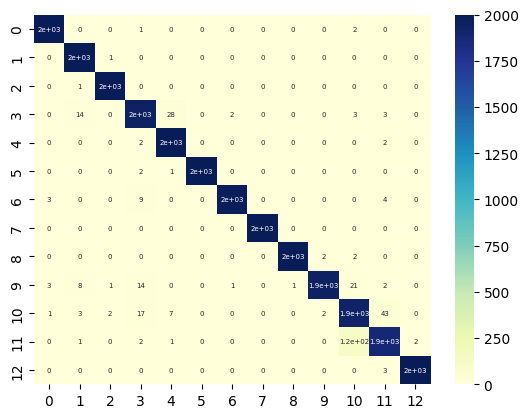

time: 1.8 s (started: 2023-04-15 20:36:00 +00:00)


In [38]:
import seaborn as sb

dataplot = sb.heatmap(cm, cmap="YlGnBu", annot=True, annot_kws={"size": 5})

plt.show()

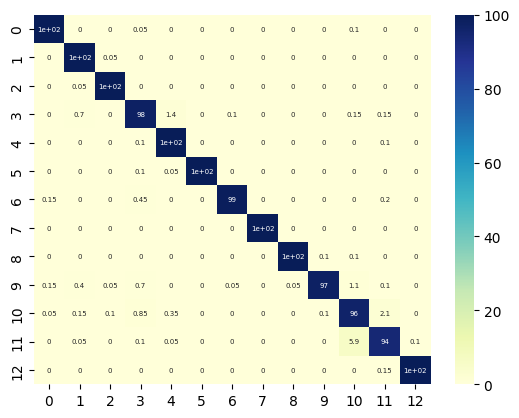

time: 1.17 s (started: 2023-04-15 20:36:02 +00:00)


In [39]:
for i in range(13):
  a=cm.iloc[i].sum()
  cm.iloc[i]= (cm.iloc[i]/a)*100

import seaborn as sb

dataplot = sb.heatmap(cm, cmap="YlGnBu", annot=True, annot_kws={"size": 5})

plt.show()

In [40]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_3, average='macro'),"\n")

print(precision_recall_fscore_support(y_test, y_3, average='micro'),"\n")

print(precision_recall_fscore_support(y_test, y_3, average='weighted'), "\n")

(0.9872618337102315, 0.9871153846153847, 0.9871250968898896, None) 

(0.9871153846153846, 0.9871153846153846, 0.9871153846153846, None) 

(0.9872618337102314, 0.9871153846153846, 0.9871250968898896, None) 

time: 941 ms (started: 2023-04-15 20:36:12 +00:00)
